In [5]:
pwd

'C:\\Users\\Ravindra\\Desktop\\Project\\my_work\\git trial'

In [1]:
ls

 Volume in drive C is OS
 Volume Serial Number is 5487-A787

 Directory of C:\Users\Ravindra\Desktop\Project\my_work\git trial

12-04-2023  06:29 PM    <DIR>          .
12-04-2023  06:23 PM    <DIR>          ..
12-04-2023  06:29 PM    <DIR>          .ipynb_checkpoints
12-04-2023  06:14 PM           422,595 Sentiment_analysis_movies_review.ipynb
               1 File(s)        422,595 bytes
               3 Dir(s)  113,614,635,008 bytes free


In [2]:
print("Hellow World")

Hellow World


ModuleNotFoundError: No module named 'git'

In [1]:
import pyprind
import pandas as pd
import os
import io


In [2]:
#how to check column
# df.columns

In [3]:
# X = df.loc[:,:].values
# X.shape

In [4]:
import numpy as np
np.random.seed(0)

df = pd.read_csv('imdb_sup_col2.csv')
df.head(5)

,review,sentiment
0,"Kurt Russell's chameleon-like performance, cou...",1
1,It was extremely low budget(it some scenes it ...,1
2,James Cagney is best known for his tough chara...,1
3,"Following the brilliant ""Goyôkiba"" (aka. ""Hanz...",1
4,One of the last classics of the French New Wav...,1


In [5]:
#how to check nan values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

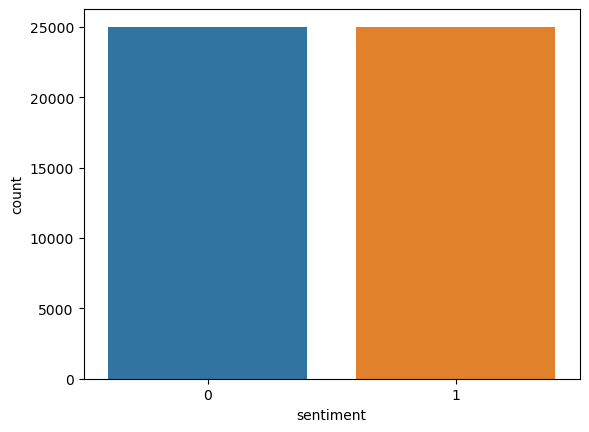

In [7]:
#how to plot the data set
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [8]:
print("shape of the data set: ", df.shape)

shape of the data set:  (50000, 2)


In [9]:
#Importing essential libraries for performing Natural Language Processing
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ravindra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Cleaning the dataset
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

corpus = []
ps = PorterStemmer()
pbar = pyprind.ProgBar(50000)
for i in range(0,df.shape[0]):
  ## Removing HTML tags
  SentimentText = cleanhtml(df.review[i])
  #Cleaning Special Character from the  SentimentText
  SentimentText = re.sub(pattern='[^a-zA-Z]', repl=' ', string=SentimentText)
  #convert the entrie row  SentimentText to the lower case
  SentimentText = SentimentText.lower()

  #Tokenizing the SentimentTexte into reviews words
  words = SentimentText.split()
  #Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]
  #Stemming the words
  words = [ps.stem(word) for word in words]
  #Joining the Stemmend words
  SentimentText = ' '.join(words)
  #Buliding a corpus of  SentimentText
  corpus.append(SentimentText)
  pbar.update()

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:52:51


In [11]:
corpus[0:3]

['kurt russel chameleon like perform coupl john carpent flawless filmmak make one without doubt one finest boob tube bio ever air hold emot foundat strong enough never age carpent preserv poster power ultim poignanc life one king rock roll borderlin elvi fan life saw mind blowingli move movi look beyond imag man quit revel elvi remain one top ten made tv movi time',
 'extrem low budget scene look like record home video record howev good plot line easi follow year shoot sexual abus step father amanda releas psychiatr ward help doctor secretli affair doctor end rent hous buy car within first minut movi amanda kill buri backyard see neighbor richard set eye stop noth act innoc anoth neighbor buzz find amanda kill doctor attempt kill richard wife lauri amanda get hot tub stop act innoc kill buzz later attempt kill richard supposedli love care rent movi find amanda die overal good movi remind lot life know whole fall neighbor stop noth part',
 'jame cagney best known tough charact gangster 

In [12]:
# #Creating the Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [13]:
X.shape

(50000, 70908)

In [14]:
y = df.iloc[:, 1].values

In [15]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
#Spliting the data set using train_test_split
from sklearn.model_selection import train_test_split
training_x,test_x,training_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

# Sentiment classification using machine learning algorthim like LR, RFC, MNB and SVM

In [84]:
#Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(training_x,training_y)

C:\Users\Ravindra\anaconda3\lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:548: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
lr.score(test_x, test_y)

0.8761

In [86]:
#predicting the result
y_pred = lr.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4945
           1       0.87      0.88      0.88      5055

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [88]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is: ",accuracy_score(test_y,y_pred))

Accuracy Score is:  0.8761


In [89]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(test_y,y_pred,normalize='true')

In [90]:
lr_cm

array([[0.86875632, 0.13124368],
       [0.11671612, 0.88328388]])

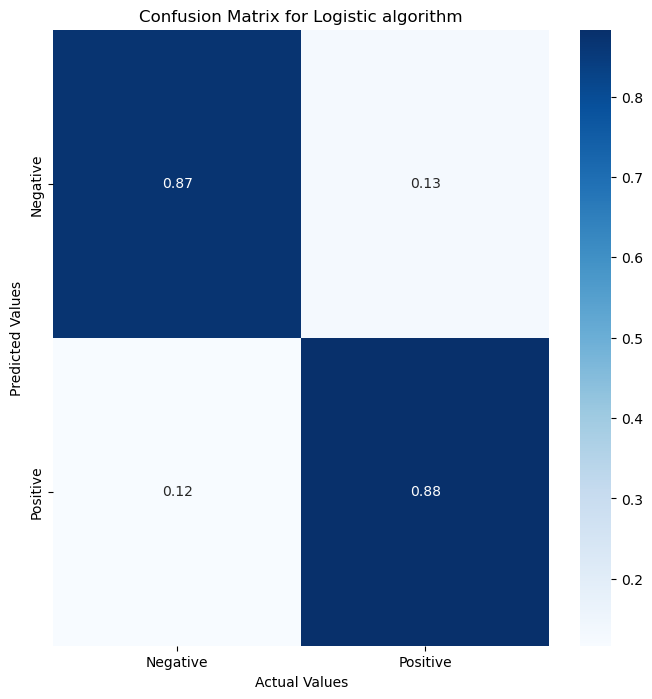

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(data=lr_cm, annot=True, cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Logistic algorithm")
plt.show()

In [92]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

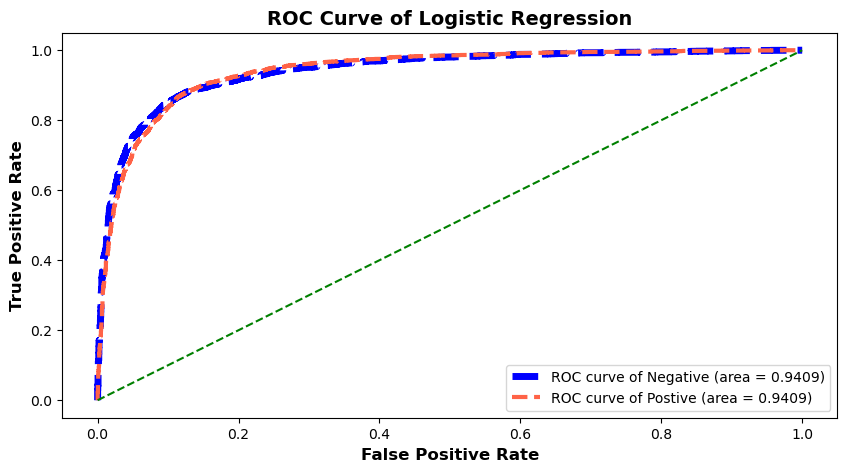

AUC Score is:  {'Negative': 0.9409271321829942, 'Postive': 0.9409271321829941}


In [93]:
print('AUC Score is: ' , plot_roc(test_x , test_y, lr, 'Logistic Regression'))

### Random Forest Classifier

In [129]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(training_x,training_y)

RandomForestClassifier(n_estimators=500)

In [130]:
rfc.score(test_x, test_y)

0.8678

In [98]:
#predicting the result
y_pred = rfc.predict(test_x)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [99]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4945
           1       0.84      0.82      0.83      5055

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [100]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.8302


In [101]:
from sklearn.metrics import confusion_matrix
rfc_cm = confusion_matrix(test_y,y_pred,normalize='true')
rfc_cm

array([[0.84064712, 0.15935288],
       [0.18001978, 0.81998022]])

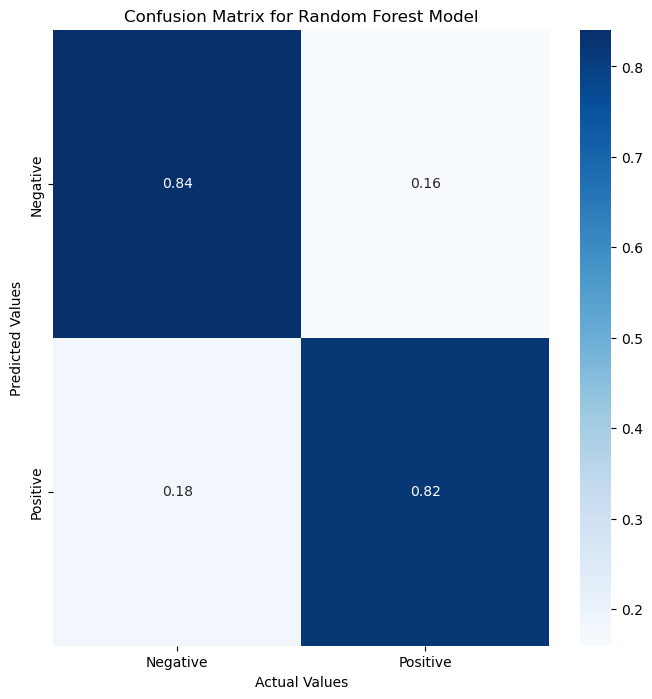

In [102]:
plt.figure(figsize=(8,8))
sns.heatmap(data=rfc_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

In [103]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

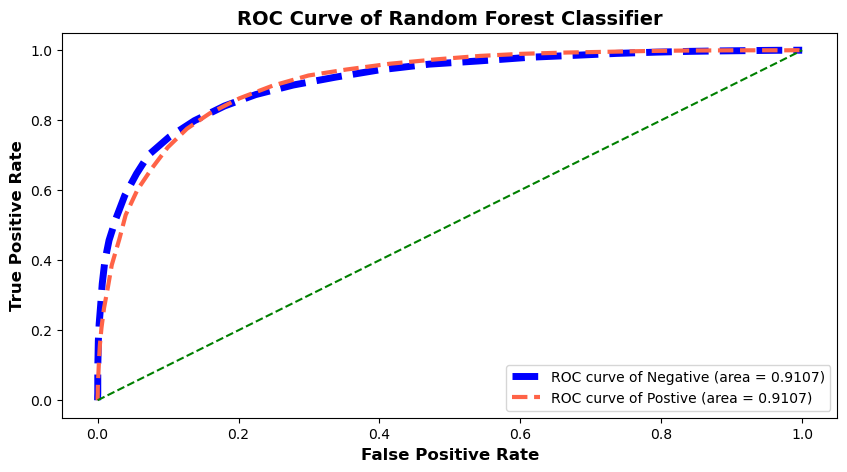

AUC Score is:  {'Negative': 0.9107394594745964, 'Postive': 0.9107394594745964}


In [104]:
print('AUC Score is: ' , plot_roc(test_x , test_y, rfc, 'Random Forest Classifier'))

### Multinomial Naive Bayes Classifier

In [34]:
#Multinomial Classifier 
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(training_x,training_y)

MultinomialNB()

In [35]:
#predicting the result
y_pred = mnb.predict(test_x)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      4945
           1       0.87      0.84      0.85      5055

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.8565


In [38]:
from sklearn.metrics import confusion_matrix
mnb_cm = confusion_matrix(test_y,y_pred,normalize='true')
mnb_cm

array([[0.87704752, 0.12295248],
       [0.1636004 , 0.8363996 ]])

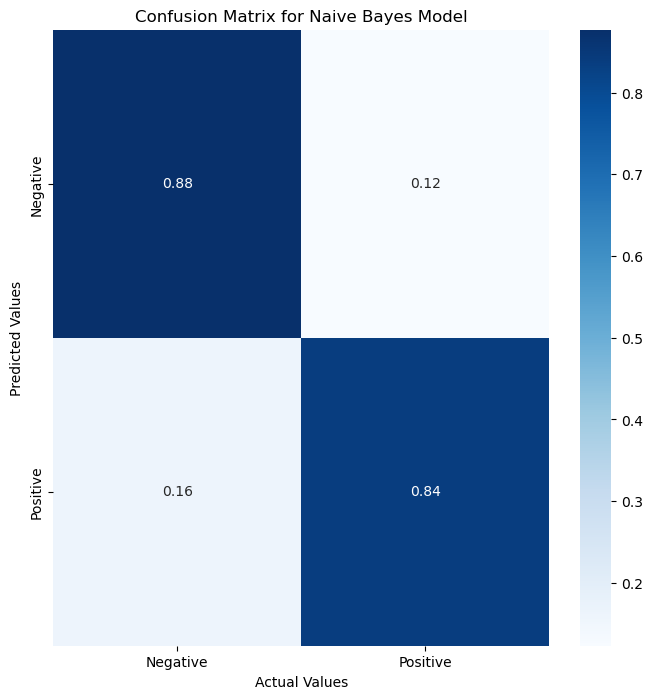

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(data=mnb_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()

In [40]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc
def plot_roc(X_true , y_true , model, model_name) :
    '''
    This function use for calculating ROC and AUC, it plots the ROC Curve and return AUC metrices of classes
    Input: X , y and model and name of the model are its parameters
    '''
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc={}
    classes = { 0 : 'Negative' , 1: 'Postive'}
    colors =  { 0 : 'blue' , 1: 'tomato', 2 : 'green'}
    y_pred_proba = model.predict_proba(X_true)
    plt.figure(figsize = (10 , 5))
    for j in range(2):
        
        # calculate roc curve values
        fpr[j], tpr[j], thresh[j] = roc_curve(y_true, y_pred_proba[:,j], pos_label=j)
        
        # claculate auc scores
        roc_auc[classes[j]] = auc(fpr[j], tpr[j])
        
        # plot roc curve
        plt.plot(fpr[j], tpr[j], linestyle='--', linewidth= 5 - (2*j), color = colors[j] ,
                 label='ROC curve of {0} (area = {1:0.4f})'.format(classes[j], roc_auc[classes[j]] ))
            
    # Random Probability
    random_probs = [0 for i in range(len(y_true))]
    p_fpr, p_tpr, p_thresh = roc_curve(y_true, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--' , color = colors[2])
    

    plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
    plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
    plt.title('ROC Curve of ' + model_name , fontsize=14,fontweight='bold')
    plt.legend(loc="best")
    plt.savefig('ROC',dpi=300)
    plt.show();
    return roc_auc

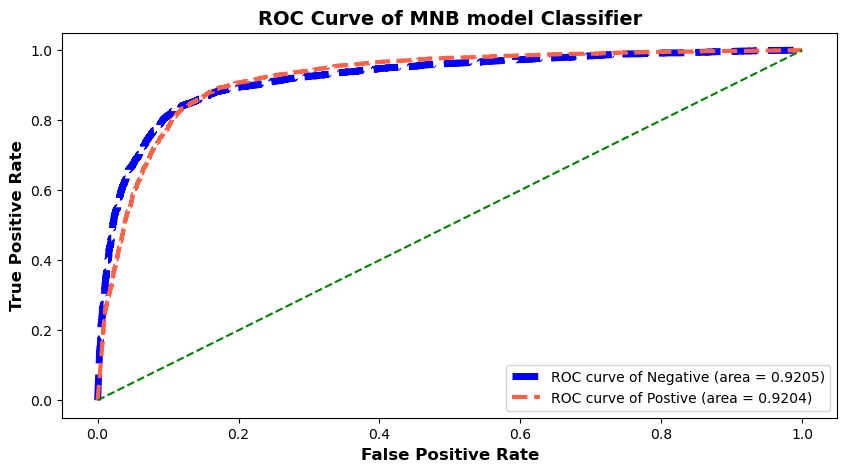

AUC Score is:  {'Negative': 0.9205160624435555, 'Postive': 0.9203991082921033}


In [41]:
print('AUC Score is: ' , plot_roc(test_x , test_y, mnb, 'MNB model Classifier'))

### Support vector classifier (SVC)

In [42]:
from sklearnex import patch_sklearn 
patch_sklearn()
from sklearn.svm import SVC # "Support vector classifier"  
svm = SVC()  
svm.fit(training_x,training_y)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


SVC()

In [43]:
#predicting the result
y_pred = svm.predict(test_x)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      4945
           1       0.86      0.91      0.88      5055

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [45]:
from sklearn.metrics import accuracy_score
print("Accuracy Score is:",accuracy_score(test_y,y_pred))

Accuracy Score is: 0.8806


In [46]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(test_y,y_pred,normalize='true')
svm_cm

array([[0.85399393, 0.14600607],
       [0.0933729 , 0.9066271 ]])

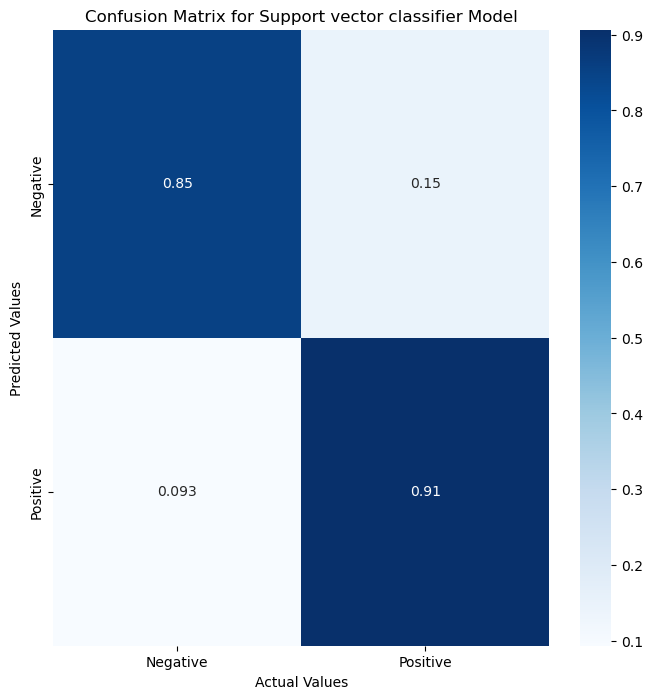

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(data=svm_cm, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Confusion Matrix for Support vector classifier Model")
plt.show()

# model Prediction with SVM and Logistic Regression

Prediction with SVM

In [48]:
def predict_sentiment(review):
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    review = re.sub(CLEANR, '',review)
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()
    return svm.predict(temp)

In [49]:
#Predicting values
review = '"In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J.'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Positive Review


In [50]:
#Predicting values
review = 'Set in and near a poor working class town in the mountains of rural Italy, a story of madness.'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Negative Review


Prediction with LR

In [51]:
def predict_sentiment(review):
    CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    review = re.sub(CLEANR, '',review)
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=review)
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in review_words]
    final_review = ' '.join(final_review)
    temp = cv.transform([final_review]).toarray()
    return lr.predict(temp)

In [52]:
#Predicting values
review = 'Do not read this, if you think about watching that movie, although it would be a waste of time'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Negative Review


In [53]:
#Predicting values
review = 'is such a great musical because it deftly blends the contrasting styles of film and stage. During a dazzling opening sequence'
if predict_sentiment(review):
    print("This is a Positive Review")
else:
    print("This is a Negative Review")

This is a Positive Review


In [54]:
print("Size of training_x: ", (training_x.shape))
print("Size of training_y: ", (training_y.shape))
print("Size of test_y: ", (test_x.shape))
print("Size of test_y: ", (test_y.shape))  

Size of training_x:  (40000, 70908)
Size of training_y:  (40000,)
Size of test_y:  (10000, 70908)
Size of test_y:  (10000,)
